In [1]:
import datetime
import pandas as pd
import numpy

In [2]:
#I didn't take data 8 :)
data = pd.read_csv("Power_and_RPM_.csv")
data.head()

,Time,RPM,Power
0,2025-03-30 14:16:50,0.0,-4.79
1,2025-03-30 14:17:00,0.0,-3.30
2,2025-03-30 14:17:10,0.0,-6.54
3,2025-03-30 14:17:20,0.0,-9.25
4,2025-03-30 14:17:30,0.0,-6.84


In [3]:
#Convert RPM to MPH with this magical formula
#Inches per Minute = RPM × Circumference. 
#MPH = (RPM × Circumference) × 60 ÷ 63,360
# Excalibur wheel radius = 21.98
pi = 3.141592653589793
data['MPH'] = (data['RPM'] * (2*pi*21.98) * 60) / 63360
data.head()

,Time,RPM,Power,MPH
0,2025-03-30 14:16:50,0.0,-4.79,0.0
1,2025-03-30 14:17:00,0.0,-3.30,0.0
2,2025-03-30 14:17:10,0.0,-6.54,0.0
3,2025-03-30 14:17:20,0.0,-9.25,0.0
4,2025-03-30 14:17:30,0.0,-6.84,0.0


In [4]:
import matplotlib.pyplot as plt


In [5]:
# 1) initial filtering
#Filter out the unrealistic data points/unneeded values
# Under 10MPH the datapoints are really inconsistent and aren't needed
#Filters out empty values as well
filtered_df = data[data['Power'].between(1, 100_000)]
doublefilter = filtered_df[filtered_df['MPH'] > 10]
doublefilter



,Time,RPM,Power,MPH
72,2025-03-30 14:28:50,202.0,71.4,26.417700
73,2025-03-30 14:29:00,286.0,164.0,37.403279
134,2025-03-30 14:39:10,372.0,373.0,48.650418
138,2025-03-30 14:39:50,334.0,596.0,43.680752
139,2025-03-30 14:40:00,360.0,569.0,47.081050
...,...,...,...,...
827,2025-03-30 16:34:40,342.0,437.0,44.726997
828,2025-03-30 16:34:50,272.0,446.0,35.572349
875,2025-03-30 16:42:40,442.0,416.0,57.805067
884,2025-03-30 16:44:10,687.0,76.0,89.846337


In [6]:
# This sorts out data sets which 
# 2) prepare for scan
first_speed = doublefilter.iloc[0]["MPH"]
list_of_index = []
num_in_a_row = 0

# 3) scan
for idx, row in doublefilter.iterrows():
    avg = row["MPH"]
    if abs(avg - first_speed) <= 2.5:
        num_in_a_row += 1
    else:
        num_in_a_row = 1
    first_speed = avg

    if num_in_a_row >= 3:
        # grab exactly the last 3 matching rows
        start = idx - 2
        list_of_index.extend(range(start, idx + 1))
        num_in_a_row = 0

in_a_row_filtered = doublefilter.loc[list_of_index]
in_a_row_filtered

# The only problem with this is that the filtered dataset there is only around
# 120 values when running this it only filters out to 6 values for data
# Pick every value within a 2.5 MPH range and its consecutive for 1 rows

,Time,RPM,Power,MPH
161,2025-03-30 14:43:40,224.0,292.0,29.294875
162,2025-03-30 14:43:50,225.0,258.0,29.425656
163,2025-03-30 14:44:00,232.0,641.0,30.341121
549,2025-03-30 15:48:20,310.0,455.0,40.542015
550,2025-03-30 15:48:30,302.0,373.0,39.495770
551,2025-03-30 15:48:40,298.0,341.0,38.972647


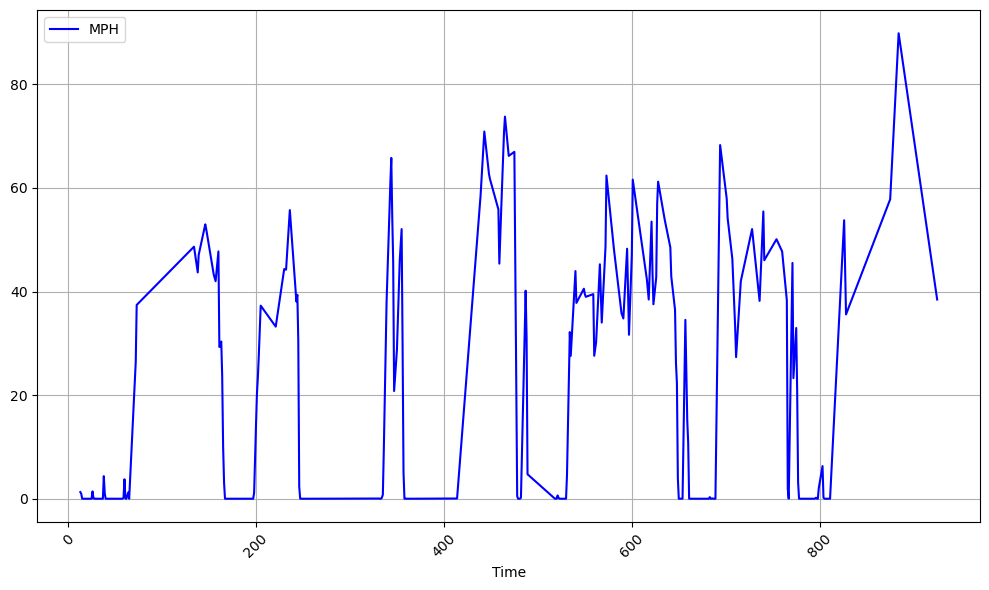

In [7]:
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(filtered_df['MPH'], label='MPH', color='blue')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


# Since the filtered out data was so small we used the non consecutive data for data points
# Optional but plot the data for MPH and Power usage

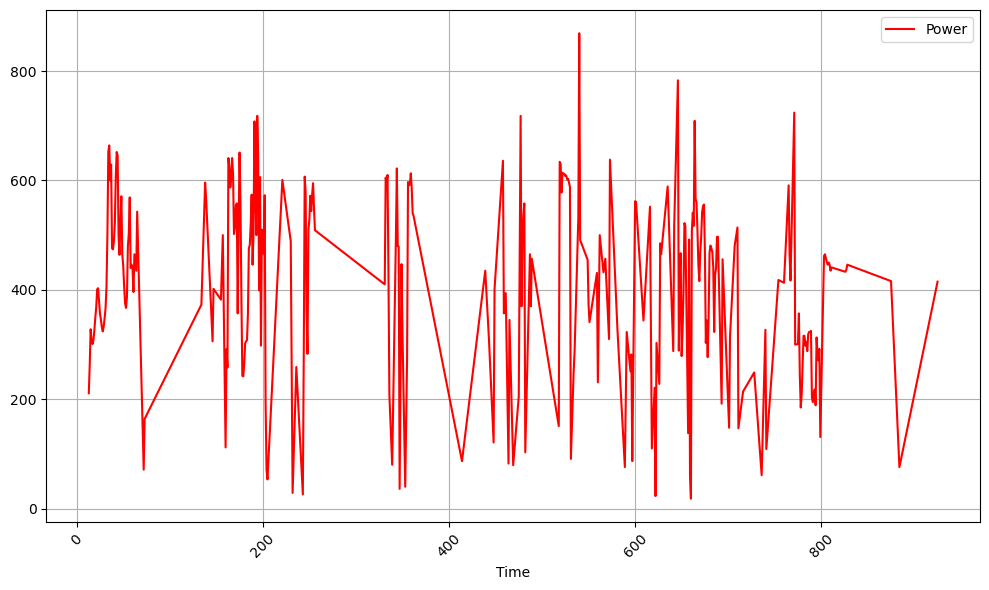

In [8]:
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(filtered_df['Power'], label='Power', color='red')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [9]:
# 1) filter to intervals
# There is probably a more automated way to do it, I just ctrl + c, ctrl+v them and renamed the data
#make new data set with everything wihtin 
# Use mean function to get average power usage during these MPH

In [10]:
fifteenmph = doublefilter[doublefilter['MPH'] < 17.5]
fifteenmph = fifteenmph[fifteenmph['MPH'] > 12.5]
fifteenmphsum = doublefilter['Power'].mean() 
print(fifteenmphsum)

356.2008333333334


In [11]:
twmph = doublefilter[doublefilter['MPH'] < 22.5]
twmph = twmph[twmph['MPH'] > 17.5]
twmphsum = twmph['Power'].mean() 

print(twmphsum)

402.04


In [12]:
tfmph = doublefilter[doublefilter['MPH'] < 27.5]
tfmph = tfmph[tfmph['MPH'] > 22.5]
tfmphsum = tfmph['Power'].mean() 
print(tfmphsum)

368.175


In [13]:
thmph = doublefilter[doublefilter['MPH'] < 32.5]
thmph = thmph[thmph['MPH'] > 27.5]
thmphsum = thmph['Power'].mean() 

print(thmphsum)

356.9230769230769


In [14]:
thfmph = doublefilter[doublefilter['MPH'] < 37.5]
thfmph = thfmph[thfmph['MPH'] > 32.5]
thfmphsum = thfmph['Power'].mean() 

print(thfmphsum)

327.2916666666667


In [15]:
fmph = doublefilter[doublefilter['MPH'] < 42.5]
fmph = fmph[fmph['MPH'] > 37.5]
fmphsum = fmph['Power'].mean() 

print(fmphsum)

342.4578947368421


In [16]:
thmph.head()

,Time,RPM,Power,MPH
161,2025-03-30 14:43:40,224.0,292.0,29.294875
162,2025-03-30 14:43:50,225.0,258.0,29.425656
163,2025-03-30 14:44:00,232.0,641.0,30.341121
203,2025-03-30 14:50:40,212.0,190.0,27.725507
245,2025-03-30 14:57:40,234.0,607.0,30.602682
